In [83]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import copy
import seaborn as sns
import warnings

In [84]:
df = pd.read_csv('vehicle-1.csv')
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [85]:
columns = df.columns
columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [86]:
df.shape

(846, 19)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [88]:
#Checking for null values
df.isna().apply(pd.value_counts)

compactness  circularity  distance_circularity  radius_ratio  \
False        846.0          841                   842           840   
True           NaN            5                     4             6   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   844                    846.0            845   
True                      2                      NaN              1   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            845                     843                      846.0   
True               1                       3                        NaN   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              843                844                        844   
True                 3                  2                          2   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          842             840               845   
True                             4               6                 1   

       skewness_about.2  hollows_ratio  class  
False               845          846.0  846.0  
True                  1            NaN    NaN

In [89]:
labelencoder = LabelEncoder()
df['class'] = labelencoder.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [90]:
#handling the missing values using scikit learn imputer
from sklearn.impute import SimpleImputer
newdf = df.copy()
X = newdf.iloc[:,0:19]
imputer = SimpleImputer(missing_values =np.nan, strategy ='median', verbose=1)
transformed_values = imputer.fit_transform(X)
#filling missing values with median column values
column = X.columns
newdf = pd.DataFrame(transformed_values, columns = column)
#Checking whether there is any missing column values
newdf.isna().apply(pd.value_counts)

compactness  circularity  distance_circularity  radius_ratio  \
False          846          846                   846           846   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   846                      846            846   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            846                     846                        846   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              846                846                        846   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          846             846               846   

       skewness_about.2  hollows_ratio  class  
False               846            846    846

In [91]:
newdf.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

In [92]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0  
class                          1.0    1.0     2.0

As we can notice that df has some missing values while newdf has zero missing values

In [93]:
#Checking for skewness
newdf.skew()

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64

Except hollows_ratio all the variables are positively skewed

C:\Users\Sarthak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Sarthak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Sarthak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sarthak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


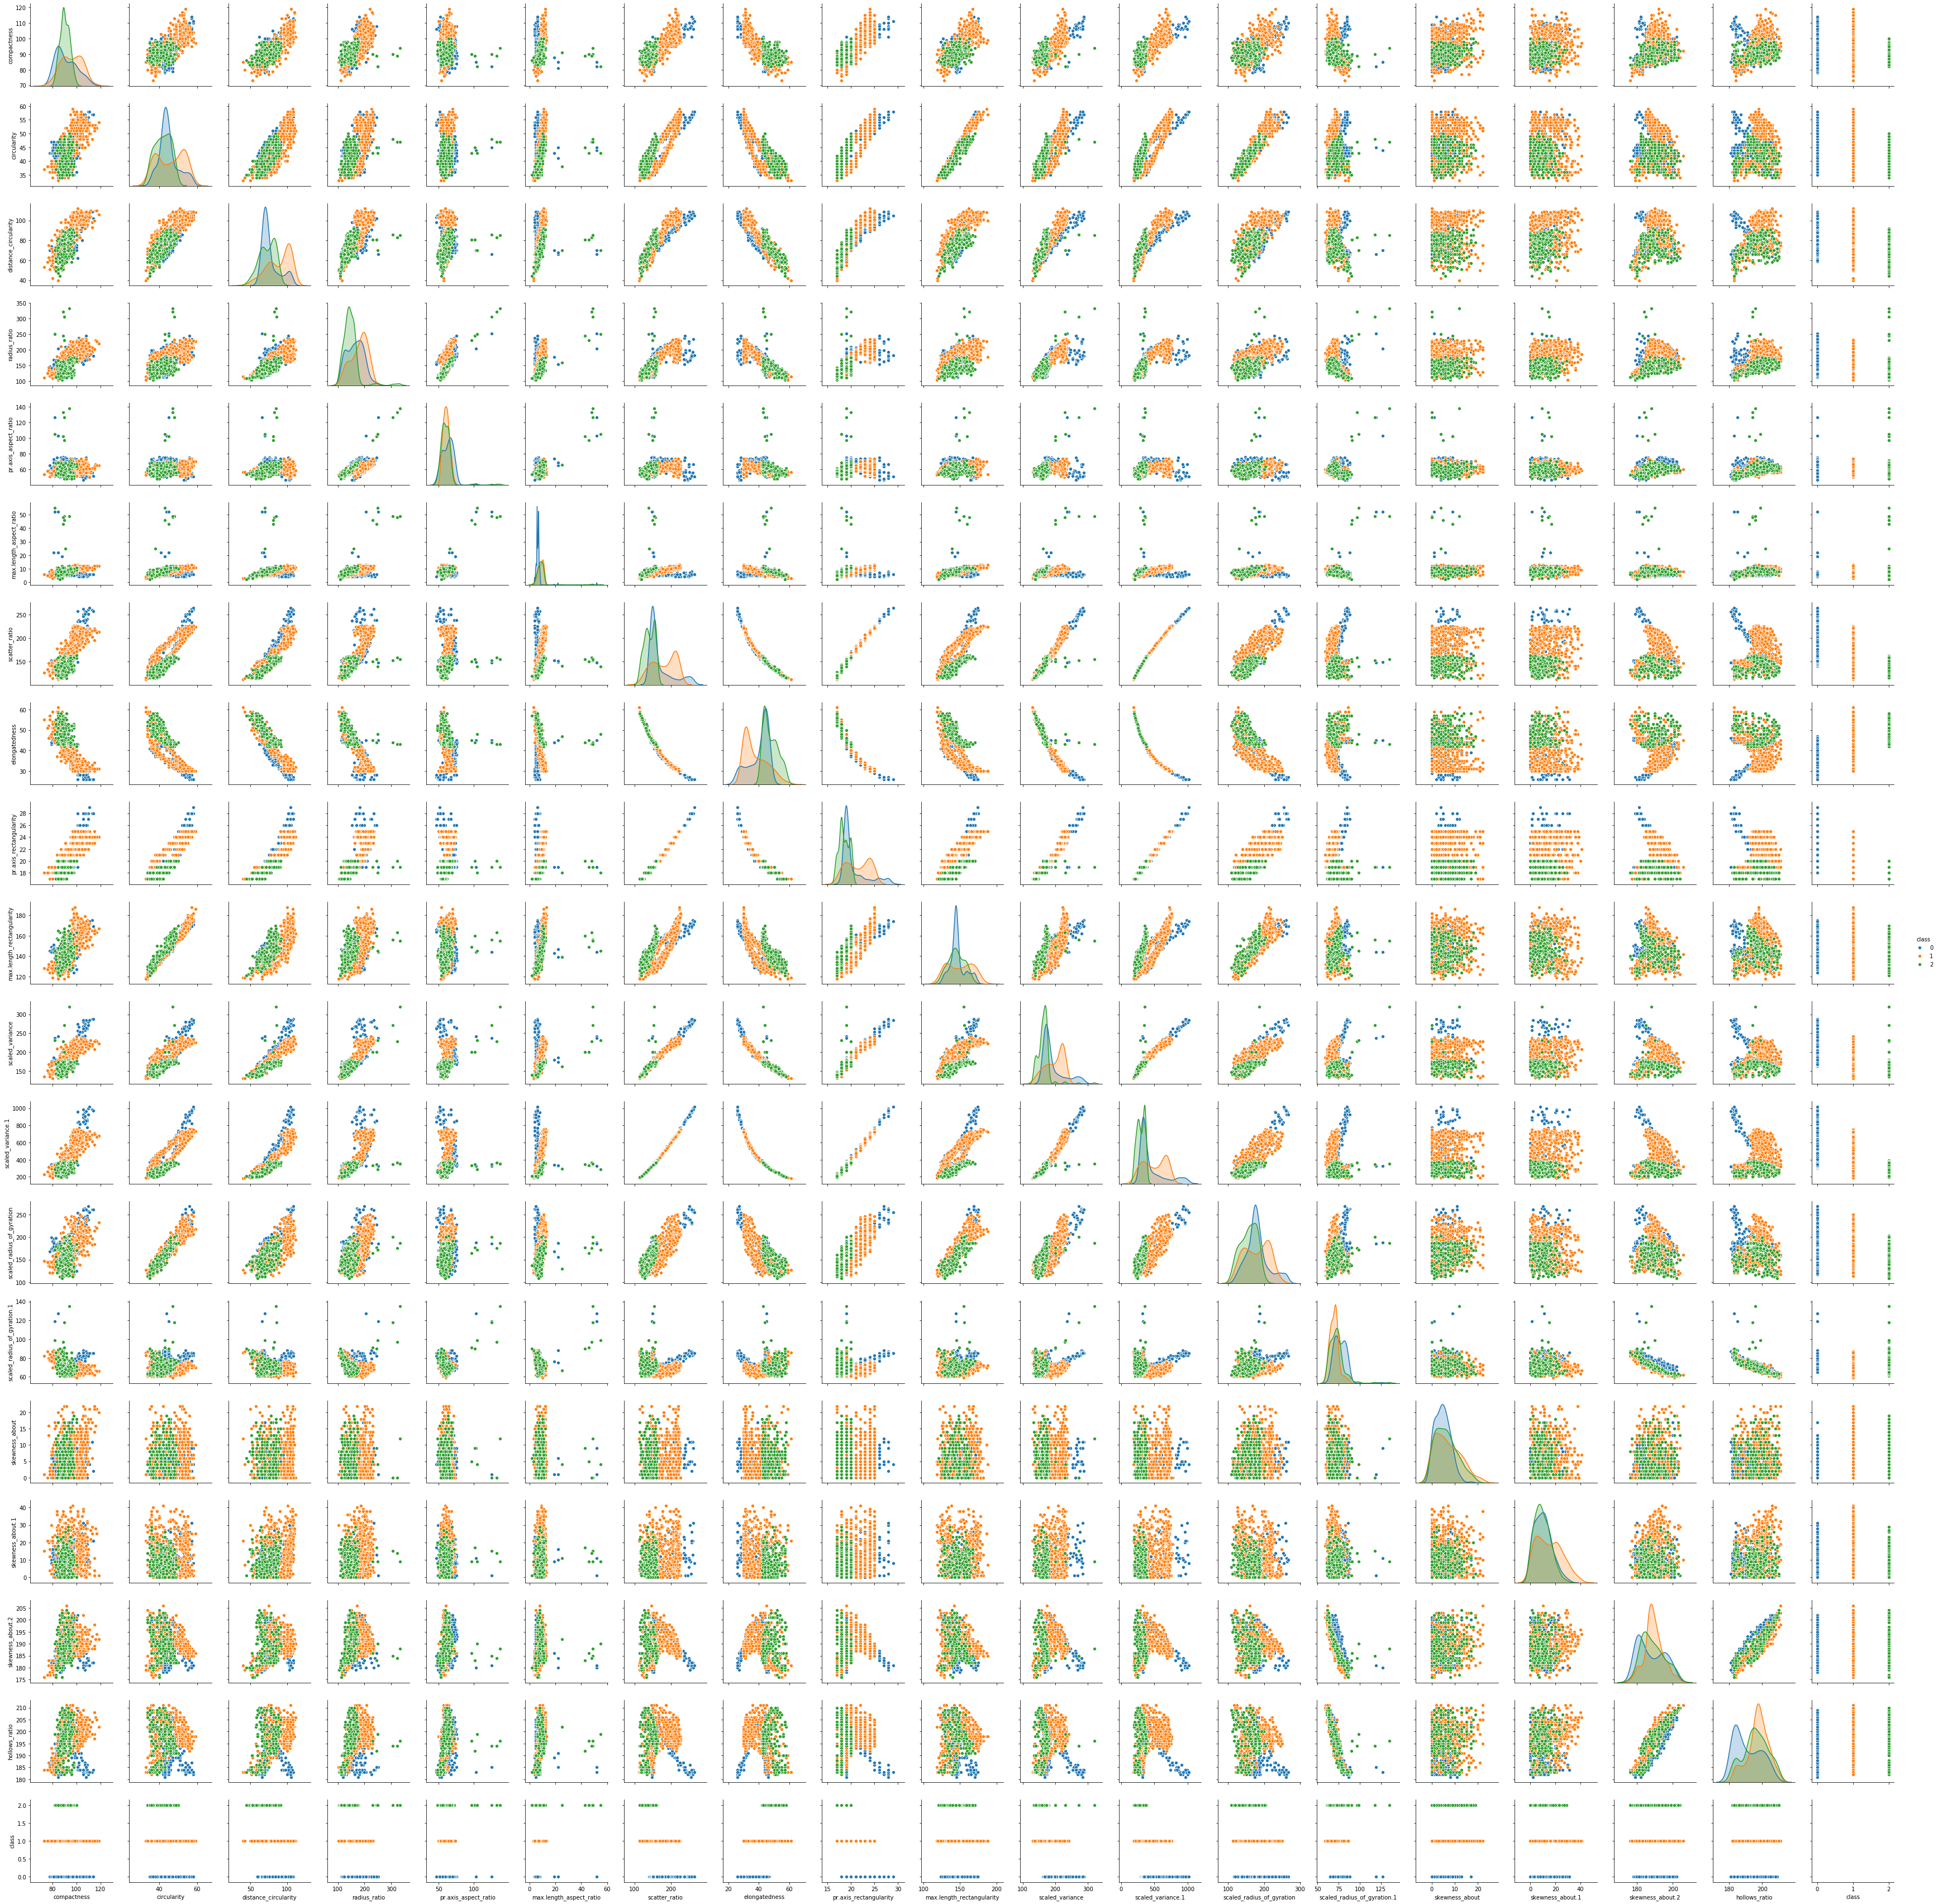

In [94]:
sns.pairplot(df, hue='class')

# Boxplots for checking of outliers

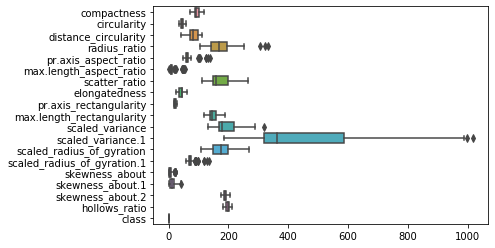

In [95]:
ax = sns.boxplot(data=newdf, orient="h")

# Using seaborn's distplot function to know distribution & skewness of certain variables

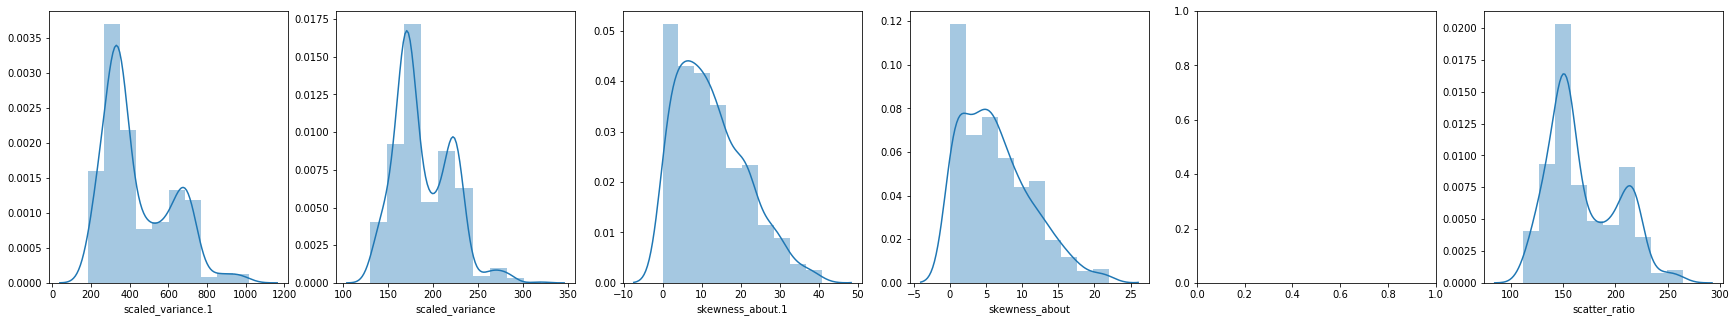

In [96]:
f,ax = plt.subplots(1, 6, figsize=(30,5))
vis1 = sns.distplot(newdf["scaled_variance.1"],bins=10, ax= ax[0])
vis2 = sns.distplot(newdf["scaled_variance"],bins=10, ax=ax[1])
vis3 = sns.distplot(newdf["skewness_about.1"],bins=10, ax= ax[2])
vis4 = sns.distplot(newdf["skewness_about"],bins=10, ax=ax[3])
vis6 = sns.distplot(newdf["scatter_ratio"],bins=10, ax=ax[5])

# Checking correlation among variables

In [97]:
corr=newdf.corr()
corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   
class                           -0.182186             -0.098178   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                            

# Checking correlation using heatmap


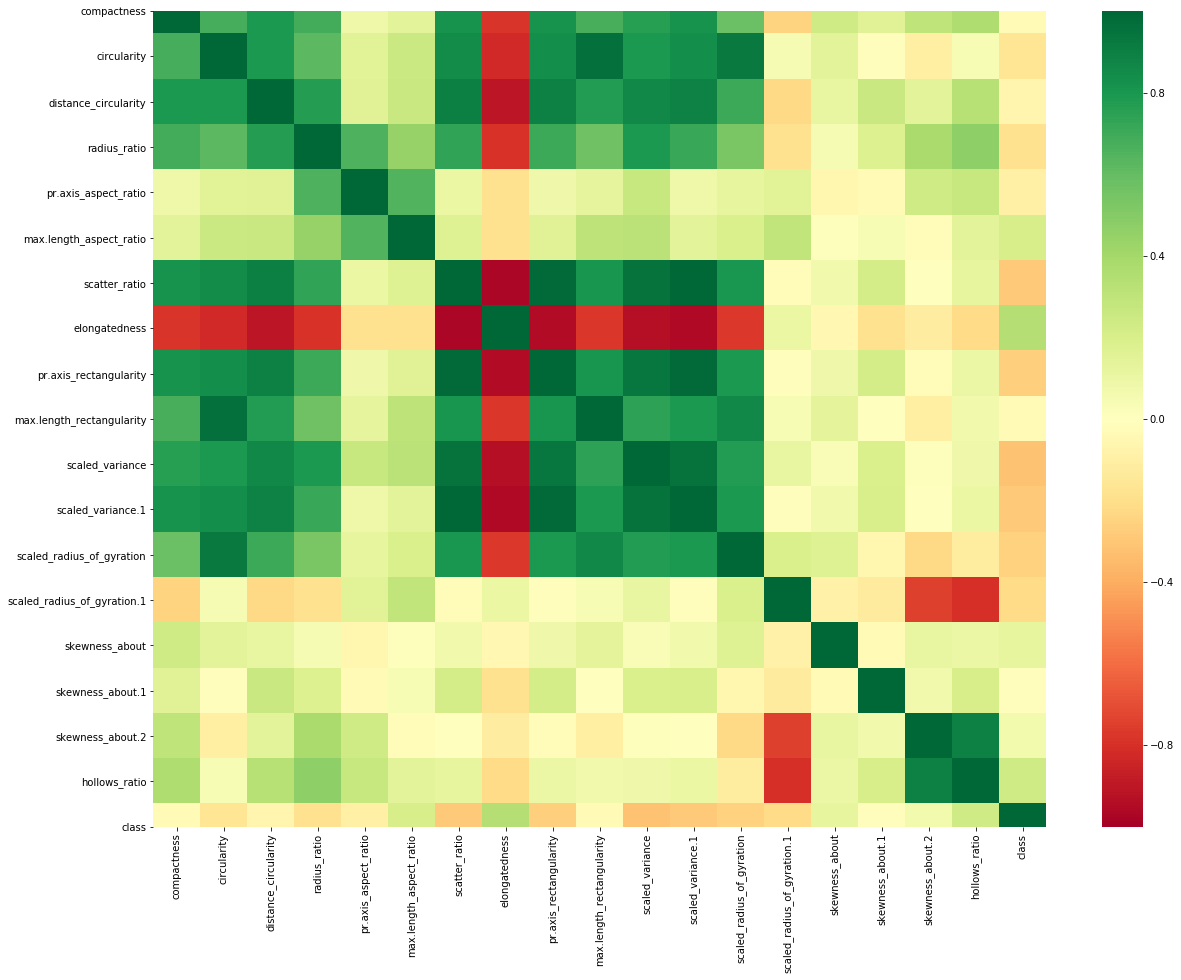

In [98]:
#Heatmap for correlation of data
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0)

   - Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.98
      - skewness_about_2 and hollow_ratio seems to be strongly correlated, corr coeff: 0.89
      - ditance_circularity and radius_ratio seems to have high positive correlation with corr coeff: 0.81
      - compactness & circularity , radius_ratio & pr.axis_aspect_ratio also seems ver averagely correlated with coeff: 0.67.
      - scaled _variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly correlated with corr coeff: 0.79
      - pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated with coeff: 0.81 
      - scatter_ratio and elongatedness seems to be have strong negative correlation val : 0.97
      - elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  0.95

Total number of car, van, and bus

1.0    429
0.0    218
2.0    199
Name: class, dtype: int64


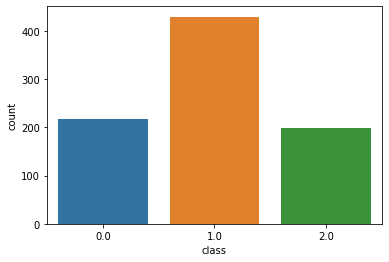

In [99]:
print(newdf['class'].value_counts())
sns.countplot(newdf['class'])

In [100]:
newdf.head()

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
4         85.0         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
4                 103.0                     52.0          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                      159.0   
1           45.0                    19.0                      143.0   
2           32.0                    23.0                      158.0   
3           46.0                    19.0                      143.0   
4           45.0                    19.0                      144.0   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0          197.0    2.0  
1             189.0          199.0    2.0  
2             188.0          196.0    1.0  
3             199.0          207.0    2.0  
4             180.0          183.0    0.0

There are more number of cars, followed by buses, then followed by Vans

In [114]:
from sklearn.model_selection import train_test_split
X1= newdf.drop('class',axis=1)
y = newdf['class']
#Splitting the data into train subset and test subset
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 10)
print(X1_train.shape)
print(X1_test.shape)

(592, 18)
(254, 18)


In [115]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X1_train_sd = StandardScaler().fit_transform(X1_train)
X1_test_sd = StandardScaler().fit_transform(X1_test)

In [116]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix_1 = np.cov(X1_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', (cov_matrix_1))

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix_1)
print('Eigenvectors \n%s' %(e_vecs))
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00169205  0.69510999  0.79093174  0.68430087  0.10533174  0.13879193
   0.81466568 -0.79249053  0.81562662  0.69493762  0.75883574  0.81360243
   0.6018784  -0.23802643  0.21659465  0.16129088  0.29107259  0.36229106]
 [ 0.69510999  1.00169205  0.80101871  0.63753441  0.17332159  0.23038915
   0.85124238 -0.82911962  0.84353731  0.96223666  0.79821698  0.8377724
   0.92490531  0.04164937  0.12317003  0.0144264  -0.08843129  0.06521593]
 [ 0.79093174  0.80101871  1.00169205  0.76084958  0.1703543   0.25346094
   0.90364003 -0.91115044  0.89344273  0.79364077  0.85618354  0.88392536
   0.72188889 -0.20587281  0.09535999  0.26881961  0.13214005  0.3236881 ]
 [ 0.68430087  0.63753441  0.76084958  1.00169205  0.68494799  0.47133546
   0.72992301 -0.78442329  0.7057782   0.60117669  0.79595443  0.7127739
   0.55325762 -0.13680084  0.02938361  0.17620666  0.36656842  0.46385678]
 [ 0.10533174  0.17332159  0.1703543   0.68494799  1.00169205  0.6847859
   0.10994971 -

In [117]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.31897364  68.66698164  79.67590997  86.1155708   91.32994925
  94.1605679   96.07303936  97.30920173  98.16726321  98.68163649
  99.07527727  99.33960144  99.54801945  99.70278098  99.81982575
  99.91558382  99.97832803 100.        ]


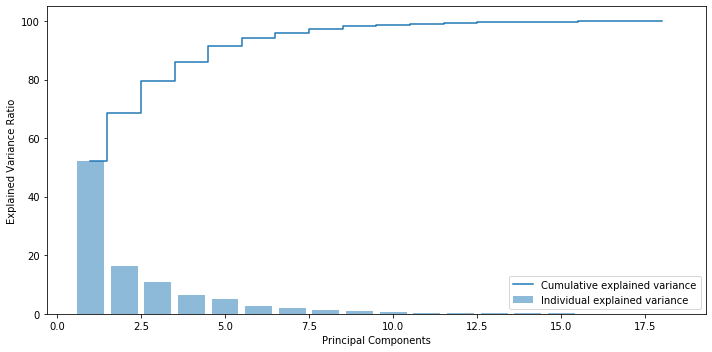

In [118]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [109]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(9.469602333556296,
  array([ 0.27531874,  0.29249553,  0.30421732,  0.27156132,  0.08823884,
          0.0976871 ,  0.31536974, -0.31312931,  0.31248945,  0.28084996,
          0.306797  ,  0.31197978,  0.26932134, -0.03885878,  0.0327516 ,
          0.05545505,  0.04590209,  0.09609506])),
 (2.939611286512293,
  array([-0.13260127,  0.13827321, -0.06129391, -0.15593848, -0.06333954,
          0.07985542,  0.04698766,  0.01495482,  0.06065016,  0.12632402,
          0.07397902,  0.05142607,  0.21013431,  0.49806571, -0.0751067 ,
         -0.12730423, -0.54509854, -0.53239457])),
 (1.961416211613696,
  array([ 0.1000485 ,  0.05388668,  0.0551805 , -0.28488969, -0.6425369 ,
         -0.57736713,  0.10224682, -0.05336043,  0.11880903,  0.05548477,
         -0.08293309,  0.11139828,  0.0526694 , -0.27321389,  0.09474675,
          0.0728345 , -0.08336479, -0.09076488])),
 (1.2121319880247725,
  array([ 0.06213413,  0.19512867, -0.07687569, -0.04249294,  0.02926989,
          0.02519532, 

In [119]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(18,1), 
                      eigen_pairs[1][1].reshape(18,1)))
print('Matrix W:\n', w)
X1_sd_pca = X1_train_sd.dot(w)
X1_test_sd_pca = X1_test_sd.dot(w)

Matrix W:
 [[ 0.27531874 -0.13260127]
 [ 0.29249553  0.13827321]
 [ 0.30421732 -0.06129391]
 [ 0.27156132 -0.15593848]
 [ 0.08823884 -0.06333954]
 [ 0.0976871   0.07985542]
 [ 0.31536974  0.04698766]
 [-0.31312931  0.01495482]
 [ 0.31248945  0.06065016]
 [ 0.28084996  0.12632402]
 [ 0.306797    0.07397902]
 [ 0.31197978  0.05142607]
 [ 0.26932134  0.21013431]
 [-0.03885878  0.49806571]
 [ 0.0327516  -0.0751067 ]
 [ 0.05545505 -0.12730423]
 [ 0.04590209 -0.54509854]
 [ 0.09609506 -0.53239457]]


In [120]:
X1_train_sd.shape, w.shape, X1_sd_pca.shape, X1_test_sd_pca.shape

((592, 18), (18, 2), (592, 2), (254, 2))

# Running SVC and checking the accuracy before & after PCA of test data

In [121]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X1_train_sd, y_train)
print ('Before PCA score', clf.score(X1_test_sd, y_test))

clf.fit(X1_sd_pca, y_train)
print ('After PCA score', clf.score(X1_test_sd_pca, y_test))

Before PCA score 0.9566929133858267
After PCA score 0.6889763779527559


C:\Users\Sarthak\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


On training data set we saw that our support vector classifier without performing PCA has an accuracy score of 96 %
But when we applied the SVC model on PCA componenets(reduced dimensions) our model performed with 67% with fall in score.

So earlier when we scaled the data first and then use it to build our model we saw a 29 % difference in accuracy score of svc model build on orignal & pca data set respectively.

Considering that original dataframe had 18 dimensions and After PCA dimension reduced to 8, our model has fared well in terms of accuracy score.